<a href="https://colab.research.google.com/github/nikolas-joyce/VIX_Term_structure_Signals/blob/main/VIX_term_structure_shift_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance vix-utils pandas numpy statsmodels matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.3/494.3 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.1/641.1 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: toolz
    Found existing installation: toolz 0.12.1
    Uninstalling toolz-0.12.1:
      Successfully uninstalled toolz-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 9.5.0 requires toolz<1,>=0.11, but you have toolz 1.1.0 which is incompatible.


In [2]:
# 1. INSTALL (run once)
!pip install vix_utils[examples]

# 2. IMPORT & LOAD DATA
import vix_utils
import asyncio
import pandas as pd

# For Jupyter notebooks (async required)
async def load_vix_data():
    # Load VIX futures term structure
    vix_term = await vix_utils.async_load_vix_term_structure()
    vix_hist = await vix_utils.async_get_vix_index_histories()

    print("✅ vix_utils LOADED:")
    print(f"Term structure: {vix_term.shape}")
    print(f"VIX history: {vix_hist.shape}")

    return vix_term, vix_hist

# RUN IT
vix_term, vix_hist = await load_vix_data()


/usr/local/lib/python3.12/dist-packages/vix_utils/download_vix_futures.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  self.valid_days_set=frozenset(d.date() for d in self.valid_days.dt.to_pydatetime())
/usr/local/lib/python3.12/dist-packages/vix_utils/vix_futures_dates.py:79: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  friday_expiration : bool = any(_valid_cfe_days.isin([option_expiry_date]))
/usr/local/lib/python3.12/dist-packages/vix_utils/vix_futures_dates.py:86: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In

✅ vix_utils LOADED:
Term structure: (49000, 20)
VIX history: (50935, 6)


🔍 vix_utils DATA EXPLORATION
✅ VIX Term Structure: (49000, 19)
✅ VIX History: (50935, 5)

📊 ANALYZING vix_term_structure: (49000, 19)


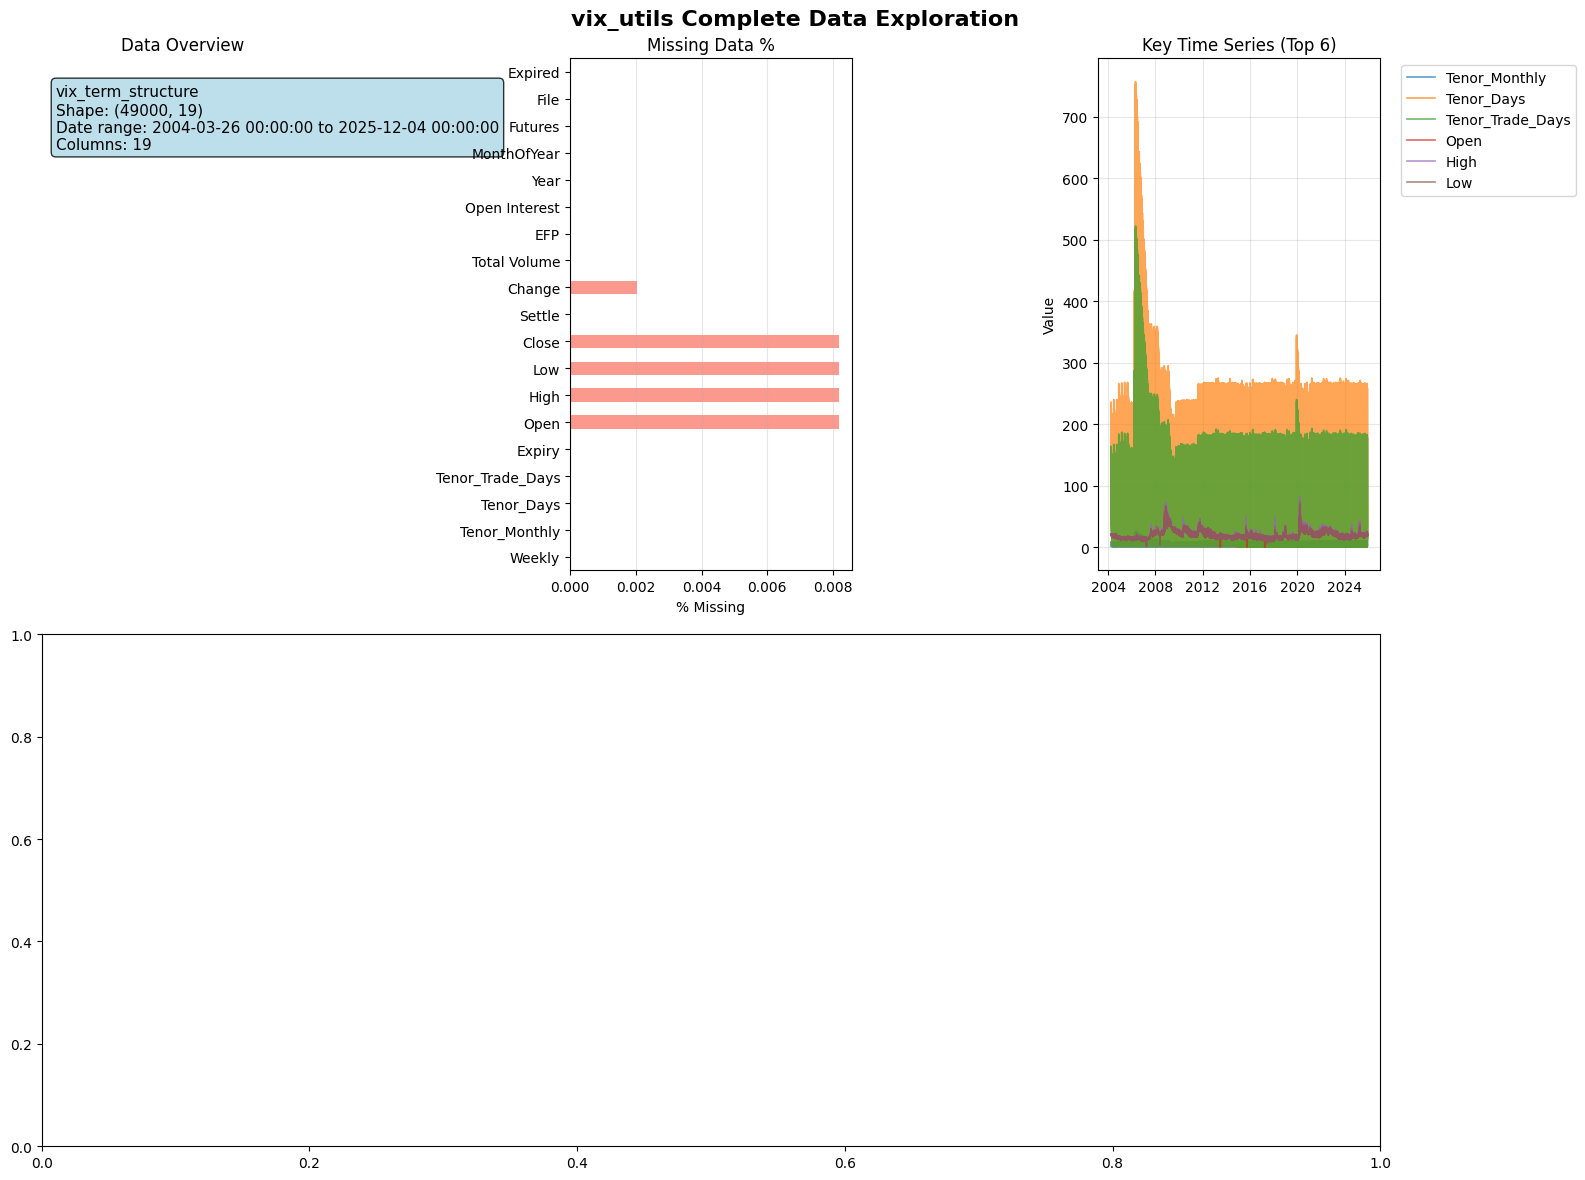


📊 DESCRIPTIVE STATISTICS:
       Tenor_Monthly  Tenor_Days  Tenor_Trade_Days  \
count      49000.000   49000.000         49000.000   
mean           4.469     117.929            81.543   
min            1.000       0.000             0.000   
25%            2.000      40.000            27.000   
50%            4.000     111.000            77.000   
75%            7.000     187.000           129.000   
max           25.000     757.000           522.000   
std            2.725      84.636            58.449   

                              Expiry       Open       High        Low  \
count                          49000  48996.000  48996.000  48996.000   
mean   2016-08-04 18:10:06.563265280     21.022     21.434     20.655   
min              2004-05-19 00:00:00      0.000      1.410      1.321   
25%              2012-01-18 00:00:00     16.720     16.980     16.480   
50%              2017-01-18 00:00:00     19.450     19.850     19.130   
75%              2021-03-17 00:00:00     24.450 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import vix_utils  # ✅ Now properly imported

# ✅ vix_utils DATA EXPLORER (with import)
print("🔍 vix_utils DATA EXPLORATION")
print("="*70)

# 1. Load vix_utils data
async def load_vix_data():
    try:
        # Load VIX term structure & history
        vix_term = await vix_utils.async_load_vix_term_structure()
        vix_hist = await vix_utils.async_get_vix_index_histories()

        # Convert 'Trade Date' to datetime and set as index for vix_term
        vix_term['Trade Date'] = pd.to_datetime(vix_term['Trade Date'])
        vix_term = vix_term.set_index('Trade Date')
        # Convert 'Trade Date' to datetime and set as index for vix_hist
        vix_hist['Trade Date'] = pd.to_datetime(vix_hist['Trade Date'])
        vix_hist = vix_hist.set_index('Trade Date')

        print(f"✅ VIX Term Structure: {vix_term.shape}")
        print(f"✅ VIX History: {vix_hist.shape}")
        return vix_term, vix_hist
    except Exception as e:
        print(f"⚠️ vix_utils load failed: {e}")
        return None, None

# Load data (Jupyter async)
import nest_asyncio
nest_asyncio.apply()
vix_term, vix_hist = await load_vix_data()

plt.figure(figsize=(16, 12))

if vix_term is not None and not vix_term.empty:
    df = vix_term
    df_name = "vix_term_structure"
else:
    df = vix_hist if vix_hist is not None else pd.DataFrame()
    df_name = "vix_history"

print(f"\n📊 ANALYZING {df_name}: {df.shape}")

# Basic info panel
plt.subplot(2, 3, 1)
plt.text(0.05, 0.95, f'{df_name}\nShape: {df.shape}\nDate range: {df.index.min()} to {df.index.max()}\nColumns: {len(df.columns)}',
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
plt.title('Data Overview')
plt.axis('off')

# Missing data
plt.subplot(2, 3, 2)
missing_pct = df.isnull().mean() * 100
missing_pct.plot(kind='barh', color='salmon', alpha=0.8)
plt.title('Missing Data %')
plt.xlabel('% Missing')
plt.grid(axis='x', alpha=0.3)

# Key time series (top 6 numeric)
plt.subplot(2, 3, 3)
numeric_cols = df.select_dtypes(include=[np.number]).columns[:6]
for col in numeric_cols:
    plt.plot(df.index, df[col], label=col, alpha=0.7, linewidth=1.2)
plt.title('Key Time Series (Top 6)')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# VIX futures curves
plt.subplot(2, 3, (4, 6))
vix_cols = [col for col in df.columns if col.startswith('VX')]
if len(vix_cols) >= 3:
    recent = df[vix_cols].tail(15).dropna(how='all')
    for i, date in enumerate(recent.index[::2]):
        curve_data = [recent.loc[date, col] for col in vix_cols if pd.notna(recent.loc[date, col])]
        if len(curve_data) >= 2:
            plt.plot(range(1, len(curve_data)+1), curve_data, 'o-',
                    label=date.strftime('%m/%d'), alpha=0.8, linewidth=2)
    plt.title(f'Recent VIX Futures Curves\n({len(vix_cols)} Maturities)')
    plt.xlabel('Maturity (months)')
    plt.ylabel('Implied Volatility')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)

plt.suptitle('vix_utils Complete Data Exploration', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('vix_utils_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\n📊 DESCRIPTIVE STATISTICS:")
print(df.describe().round(3))

# VIX curve analysis
if len(vix_cols) >= 2:
    print(f"\n📈 VIX CURVE METRICS:")
    slopes = {}
    for i in range(1, len(vix_cols)):
        slope = df[vix_cols[i]] - df[vix_cols[i-1]]
        slopes[f'{vix_cols[i]}-{vix_cols[i-1]}'] = {
            'Mean': slope.mean(),
            'Contango %': (slope > 0).mean()*100,
            'Std': slope.std()
        }
    print(pd.DataFrame(slopes).T.round(2))

print(f"\n🎉 vix_utils EXPLORATION COMPLETE!")
print(f"✅ Ready for VIX term structure analysis!")

In [9]:
! pip install vix_utils[examples]

In [13]:
import vix_utils

In [15]:
import vix_utils
import inspect

# List all public functions and classes
functions = [name for name, obj in inspect.getmembers(vix_utils, inspect.isfunction) if not name.startswith('_')]
classes = [name for name, obj in inspect.getmembers(vix_utils, inspect.isclass) if not name.startswith('_')]
print("Functions:", functions)
print("Classes:", classes)

# Detailed signatures for key functions
for func_name in ['async_load_vix_term_structure', 'get_vix_index_histories']:
    if hasattr(vix_utils, func_name):
        print(inspect.signature(getattr(vix_utils, func_name)))


Functions: ['append_continuous_maturity_one_month', 'async_get_vix_index_histories', 'async_load_vix_term_structure', 'continuous_maturity_one_month', 'get_vix_index_histories', 'load_vix_term_structure', 'pivot_futures_on_monthly_tenor', 'pivot_spot_term_structure_on_symbol', 'select_monthly_futures', 'vix_constant_maturity_weights', 'vix_futures_expiry_date_from_trade_date', 'vix_futures_trade_dates_and_expiry_dates']
Classes: []
(forceReload=False) -> pandas.core.frame.DataFrame
()


In [20]:
import asyncio
from vix_utils import async_load_vix_term_structure, async_get_vix_index_histories

# Load full term structure (includes VX0=spot VIX, VX1, VX2, VX3+)
ts_df = await async_load_vix_term_structure()
print(ts_df.columns)  # Shows 'VX0', 'VX1', 'VX2', 'VX3', etc.

# Load VIX cash indices separately (VIX9D, VIX, VIX3M, etc.)
cash_df = await async_get_vix_index_histories()


Index(['Trade Date', 'Weekly', 'Tenor_Monthly', 'Tenor_Days',
       'Tenor_Trade_Days', 'Expiry', 'Open', 'High', 'Low', 'Close', 'Settle',
       'Change', 'Total Volume', 'EFP', 'Open Interest', 'Year', 'MonthOfYear',
       'Futures', 'File', 'Expired'],
      dtype='object')


In [22]:
print(ts_df.columns.tolist())
print(ts_df.head())
print(cash_df.columns.tolist())


['Trade Date', 'Weekly', 'Tenor_Monthly', 'Tenor_Days', 'Tenor_Trade_Days', 'Expiry', 'Open', 'High', 'Low', 'Close', 'Settle', 'Change', 'Total Volume', 'EFP', 'Open Interest', 'Year', 'MonthOfYear', 'Futures', 'File', 'Expired']
      Trade Date  Weekly  Tenor_Monthly  Tenor_Days  Tenor_Trade_Days  \
42532 2004-03-26   False            2.0          53              38.0   
59424 2004-03-26   False            3.0          81              56.0   
43302 2004-03-26   False            5.0         144             100.0   
42368 2004-03-26   False            8.0         236             164.0   
42533 2004-03-29   False            2.0          50              37.0   

          Expiry   Open   High    Low  Close  Settle  Change  Total Volume  \
42532 2004-05-19  21.24  21.25  20.27  20.27   20.32     0.0           216   
59424 2004-06-16  20.33  20.37  20.10  20.20   20.16     0.0            26   
43302 2004-08-18  20.04  20.13  20.00  20.06   20.11     0.0            37   
42368 2004-11-17  

In [23]:
# Use actual columns from print() above, e.g.:
available_cols = [col for col in ts_df.columns if 'VX' in str(col)][:4]  # First 4 VX columns
ts_subset = ts_df[available_cols]

# VIX cash is typically in cash_df, merge on index (trade dates)
df_combined = ts_subset.join(cash_df['VIX'], how='inner')
print(df_combined.head())
df_combined.to_csv('vix_data.csv')


KeyError: 'VIX'

In [26]:
# Reset the index to ensure 'Trade Date' is a column for pivoting
vix_term_temp = vix_term.reset_index()

# Select relevant columns for pivoting: Trade Date, Tenor_Monthly, Settle price
pivot_data = vix_term_temp[['Trade Date', 'Tenor_Monthly', 'Settle']]

# Handle potential duplicates if any (e.g., if multiple entries for same Trade Date and Tenor_Monthly)
pivot_data = pivot_data.drop_duplicates(subset=['Trade Date', 'Tenor_Monthly'], keep='last')

# Pivot the DataFrame to get monthly tenors as columns, with 'Settle' values
pivoted_vix_term = pivot_data.pivot(index='Trade Date', columns='Tenor_Monthly', values='Settle')

# Rename the columns from tenor numbers (1.0, 2.0, ...) to VX0, VX1, VX2, VX3, etc.
# This assumes Tenor_Monthly 1.0 corresponds to VX0, 2.0 to VX1, and so on.
column_mapping = {float(i + 1): f'VX{i}' for i in range(len(pivoted_vix_term.columns))}
pivoted_vix_term = pivoted_vix_term.rename(columns=column_mapping)

# Select the requested series
vix_futures_series = pivoted_vix_term[['VX0', 'VX1', 'VX2', 'VX3']]
display(vix_futures_series.head())

Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2004-03-26,NaN,20.32,20.16,NaN
2004-03-29,NaN,19.80,19.77,NaN
2004-03-30,NaN,19.62,19.79,NaN
2004-03-31,NaN,19.75,19.85,NaN
2004-04-01,NaN,19.62,19.61,NaN


<Axes: xlabel='Trade Date'>

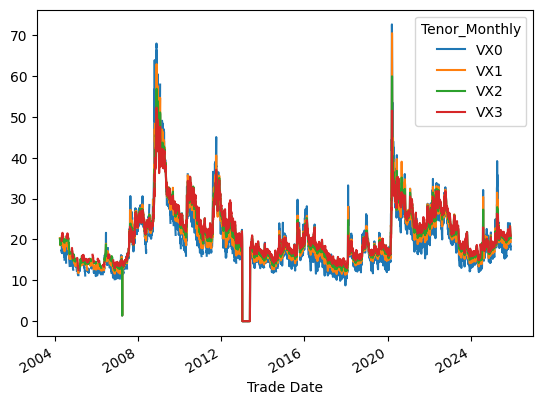

In [27]:
vix_futures_series.plot()

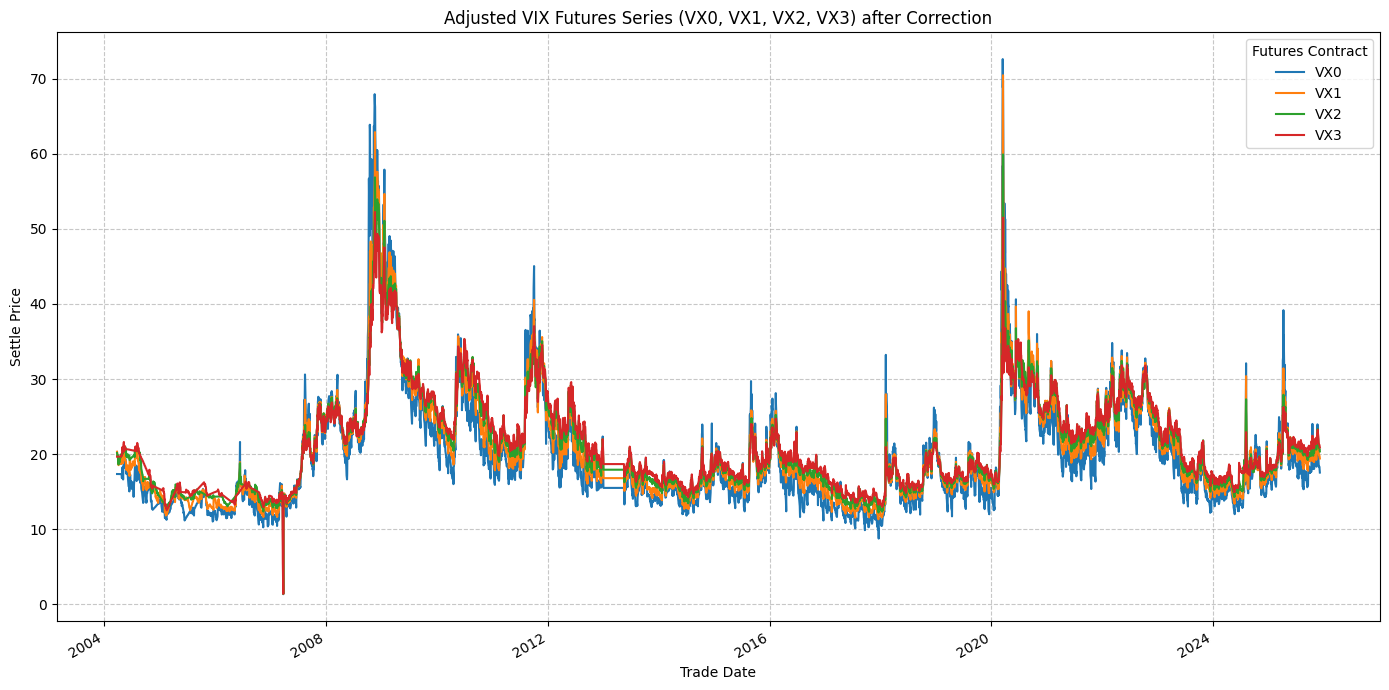

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
vix_futures_series_adjusted.plot(ax=plt.gca())
plt.title('Adjusted VIX Futures Series (VX0, VX1, VX2, VX3) after Correction')
plt.xlabel('Trade Date')
plt.ylabel('Settle Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Futures Contract')
plt.tight_layout()
plt.show()

This plot displays the `vix_futures_series_adjusted` DataFrame, showing the VIX futures series after applying both the initial linear interpolation and the subsequent correction for the zero-value period. You should now see a more complete and continuous representation of the data.

In [32]:
# Create a copy to work with, to preserve the original interpolated data if needed
vix_futures_series_adjusted = vix_futures_series_interpolated.copy()

# Define the start and end dates of the zero period identified earlier
start_zero_period = pd.to_datetime('2013-01-02')
end_zero_period = pd.to_datetime('2013-05-17')

# Get the mask for the zero period
zeros_mask = (vix_futures_series_adjusted.index >= start_zero_period) & \
             (vix_futures_series_adjusted.index <= end_zero_period)

# Loop through each 'VX' column to apply the average
for col in ['VX0', 'VX1', 'VX2', 'VX3']:
    # Find the value just before the zero period
    value_before = vix_futures_series_adjusted[col][vix_futures_series_adjusted.index < start_zero_period].iloc[-1]

    # Find the value just after the zero period
    value_after = vix_futures_series_adjusted[col][vix_futures_series_adjusted.index > end_zero_period].iloc[0]

    # Calculate the average
    average_value = (value_before + value_after) / 2

    # Fill the zero period with the calculated average
    vix_futures_series_adjusted.loc[zeros_mask, col] = average_value

print("Adjusted VIX Futures Series (Head):")
display(vix_futures_series_adjusted.head())
print("\nAdjusted VIX Futures Series (Zero Period - sample):")
display(vix_futures_series_adjusted.loc[start_zero_period:end_zero_period].head())
print("\nAdjusted VIX Futures Series (Tail):")
display(vix_futures_series_adjusted.tail())

Adjusted VIX Futures Series (Head):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2004-03-26,17.35,20.32,20.16,19.67
2004-03-29,17.35,19.80,19.77,19.67
2004-03-30,17.35,19.62,19.79,19.67
2004-03-31,17.35,19.75,19.85,19.67
2004-04-01,17.35,19.62,19.61,19.67



Adjusted VIX Futures Series (Zero Period - sample):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2013-01-02,15.5,16.8,17.925,18.675
2013-01-03,15.5,16.8,17.925,18.675
2013-01-04,15.5,16.8,17.925,18.675
2013-01-07,15.5,16.8,17.925,18.675
2013-01-08,15.5,16.8,17.925,18.675



Adjusted VIX Futures Series (Tail):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2025-11-28,18.2687,19.8670,20.8383,21.2931
2025-12-01,18.3442,19.8539,20.7988,21.2461
2025-12-02,17.9472,19.5901,20.5527,21.0750
2025-12-03,17.7946,19.5796,20.5495,21.0050
2025-12-04,17.5422,19.4156,20.3593,20.8879


This code snippet creates a copy of the interpolated series and then specifically targets the identified zero-value period (from 2013-01-02 to 2013-05-17). For each 'VX' column, it finds the last non-zero value *before* this period and the first non-zero value *after* this period. It then calculates the average of these two values and replaces all the zeros within the specified window with that average. The head, a sample from the modified zero period, and the tail of the `vix_futures_series_adjusted` DataFrame are displayed to show the changes.

In [31]:
# Identify rows where all selected VIX futures values are zero
zeros_mask = (vix_futures_series_interpolated[['VX0', 'VX1', 'VX2', 'VX3']] == 0).all(axis=1)

if zeros_mask.any():
    zero_periods = vix_futures_series_interpolated[zeros_mask]
    print("Rows where all VX0, VX1, VX2, VX3 are zero:")
    display(zero_periods)

    # Get the start and end dates of the zero periods
    if not zero_periods.empty:
        start_date_zeros = zero_periods.index.min()
        end_date_zeros = zero_periods.index.max()
        print(f"\nZero values detected from {start_date_zeros.strftime('%Y-%m-%d')} to {end_date_zeros.strftime('%Y-%m-%d')}.")
else:
    print("No periods where all VX0, VX1, VX2, VX3 are simultaneously zero.")

# Also check for individual columns having zero values over time
print("\nNumber of zero values per column:")
display((vix_futures_series_interpolated == 0).sum())

Rows where all VX0, VX1, VX2, VX3 are zero:


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2013-01-02,0.0,0.0,0.0,0.0
2013-01-03,0.0,0.0,0.0,0.0
2013-01-04,0.0,0.0,0.0,0.0
2013-01-07,0.0,0.0,0.0,0.0
2013-01-08,0.0,0.0,0.0,0.0
...,...,...,...,...
2013-05-13,0.0,0.0,0.0,0.0
2013-05-14,0.0,0.0,0.0,0.0
2013-05-15,0.0,0.0,0.0,0.0



Zero values detected from 2013-01-02 to 2013-05-17.

Number of zero values per column:


,0
Tenor_Monthly,
VX0,95
VX1,95
VX2,95
VX3,95


This code snippet checks for rows where *all* the 'VX0', 'VX1', 'VX2', 'VX3' columns are simultaneously zero and identifies the date range of such occurrences. It also shows the count of zero values for each column individually in the interpolated series. This will help us understand the extent and location of the zeros you observed.

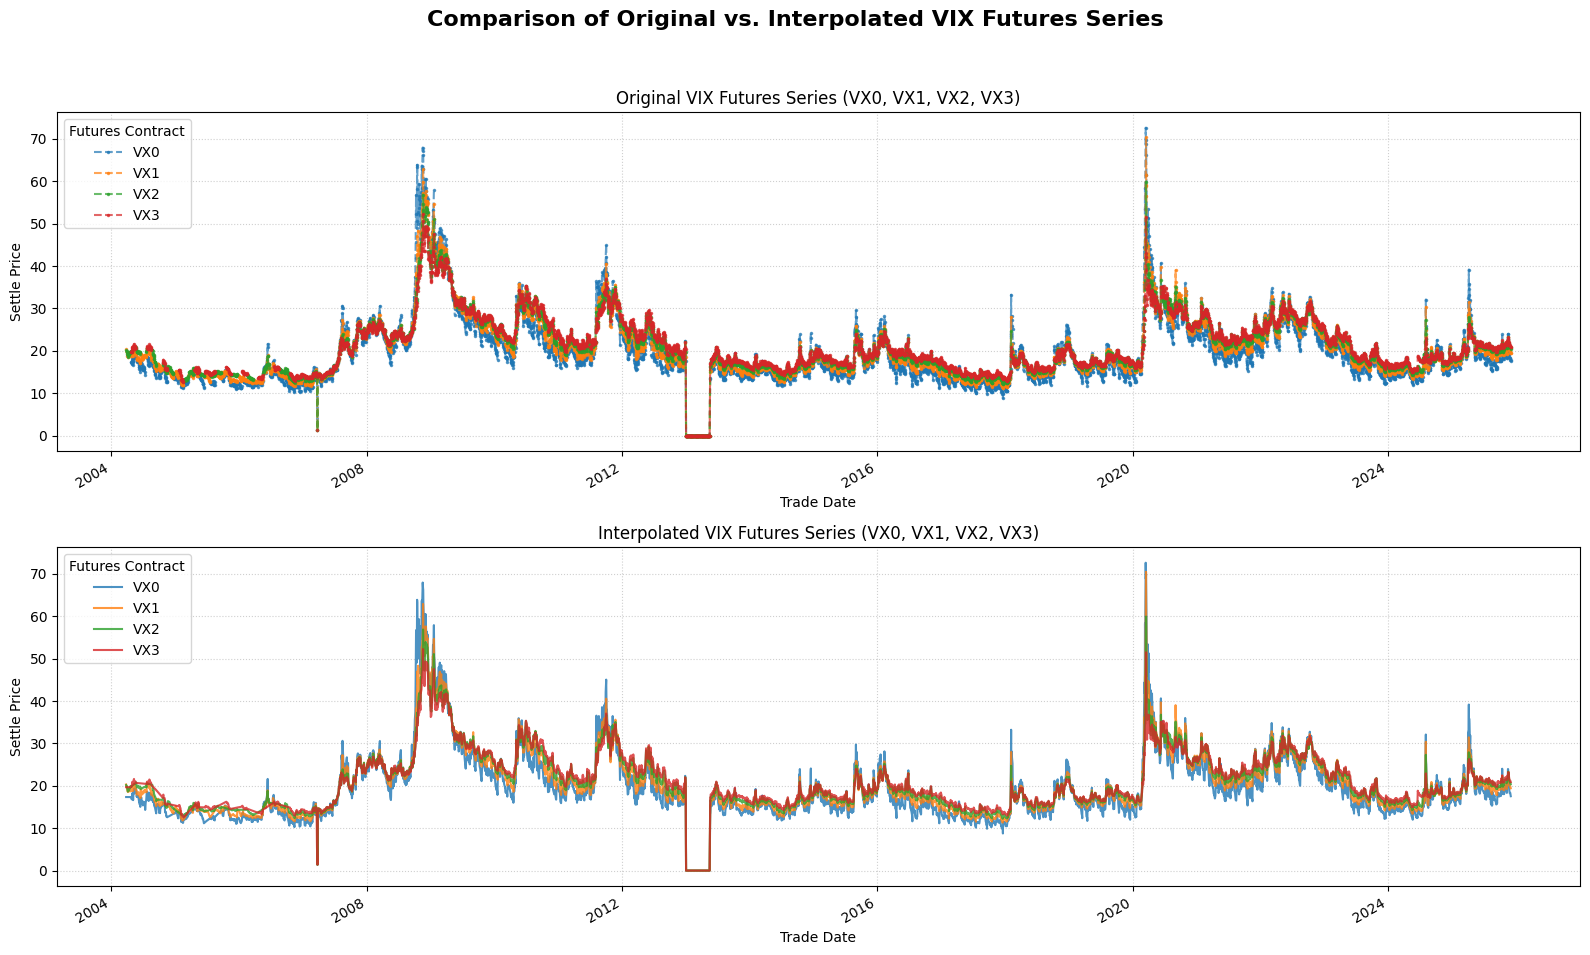

In [30]:
plt.figure(figsize=(16, 10))

# Plotting original data
plt.subplot(2, 1, 1)
vix_futures_series.plot(ax=plt.gca(), alpha=0.7, linestyle='--', marker='.', markersize=3)
plt.title('Original VIX Futures Series (VX0, VX1, VX2, VX3)')
plt.ylabel('Settle Price')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Futures Contract', loc='upper left')

# Plotting interpolated data
plt.subplot(2, 1, 2)
vix_futures_series_interpolated.plot(ax=plt.gca(), alpha=0.8, linewidth=1.5)
plt.title('Interpolated VIX Futures Series (VX0, VX1, VX2, VX3)')
plt.xlabel('Trade Date')
plt.ylabel('Settle Price')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Futures Contract', loc='upper left')

plt.suptitle('Comparison of Original vs. Interpolated VIX Futures Series', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This plot shows the original `vix_futures_series` in the top panel and the `vix_futures_series_interpolated` in the bottom panel. You can compare them to visually assess how the linear interpolation filled the missing data points, especially in areas where the original series had gaps (which appear as breaks in the dashed lines).

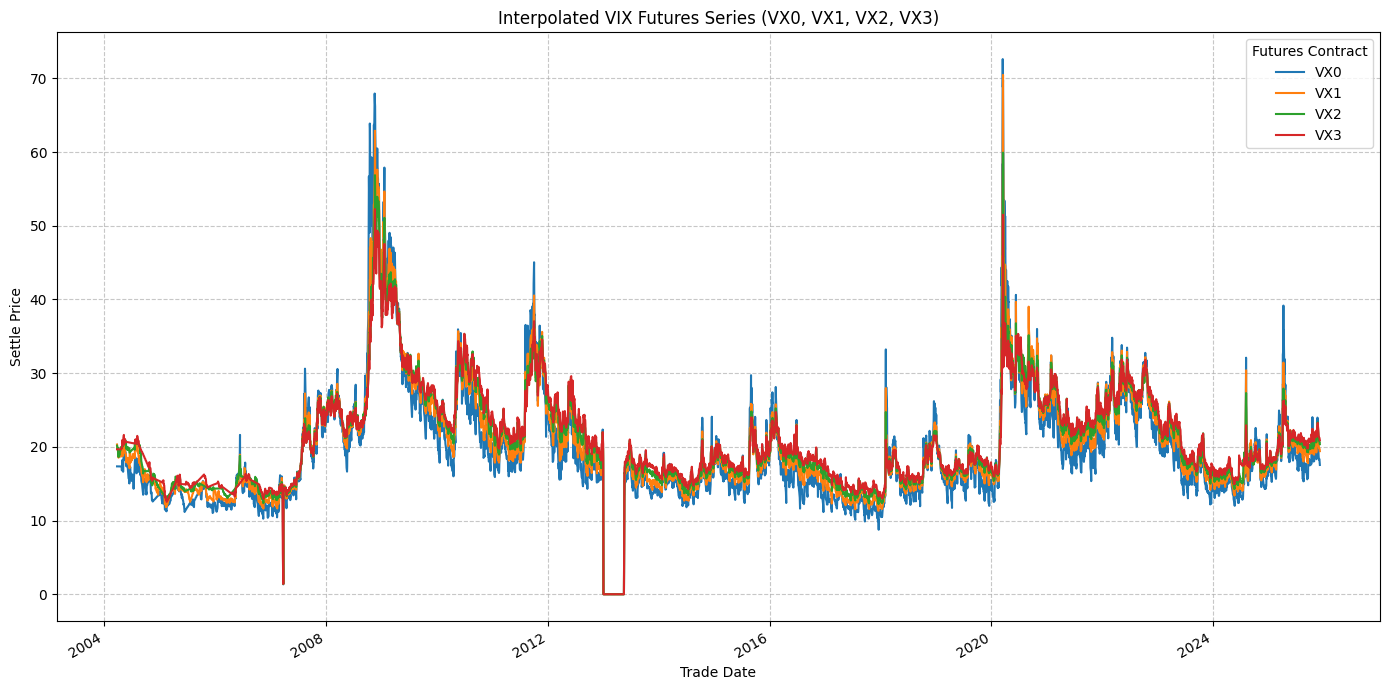

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
vix_futures_series_interpolated.plot(ax=plt.gca())
plt.title('Interpolated VIX Futures Series (VX0, VX1, VX2, VX3)')
plt.xlabel('Trade Date')
plt.ylabel('Settle Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Futures Contract')
plt.tight_layout()
plt.show()

Missing values before interpolation:


,0
Tenor_Monthly,
VX0,246
VX1,110
VX2,335
VX3,447



Missing values after interpolation:


,0
Tenor_Monthly,
VX0,0
VX1,0
VX2,0
VX3,0



Interpolated VIX Futures Series (Head):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2004-03-26,17.35,20.32,20.16,19.67
2004-03-29,17.35,19.80,19.77,19.67
2004-03-30,17.35,19.62,19.79,19.67
2004-03-31,17.35,19.75,19.85,19.67
2004-04-01,17.35,19.62,19.61,19.67



Interpolated VIX Futures Series (Tail):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2025-11-28,18.2687,19.8670,20.8383,21.2931
2025-12-01,18.3442,19.8539,20.7988,21.2461
2025-12-02,17.9472,19.5901,20.5527,21.0750
2025-12-03,17.7946,19.5796,20.5495,21.0050
2025-12-04,17.5422,19.4156,20.3593,20.8879


<Axes: xlabel='VX0'>

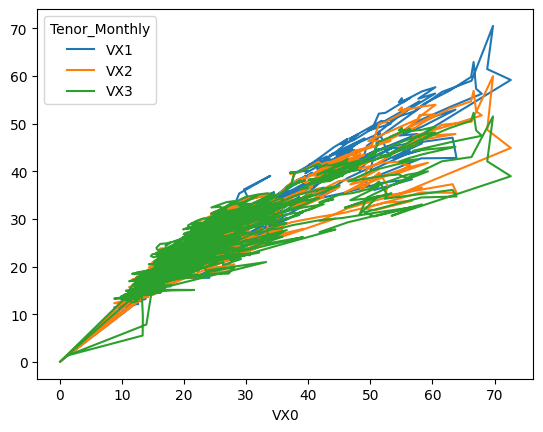

In [34]:
# Identify missing values (NaNs) in the DataFrame
print("Missing values before interpolation:")
display(vix_futures_series.isnull().sum())

# Apply linear interpolation to fill NaN values
vix_futures_series_interpolated = vix_futures_series.interpolate(method='linear', limit_direction='both')

# Display missing values after interpolation
print("\nMissing values after interpolation:")
display(vix_futures_series_interpolated.isnull().sum())

# Display the head and tail of the interpolated DataFrame
print("\nInterpolated VIX Futures Series (Head):")
display(vix_futures_series_interpolated.head())
print("\nInterpolated VIX Futures Series (Tail):")
display(vix_futures_series_interpolated.tail())

vix_futures_series_interpolated.plot()

This code first checks for any missing values (NaNs) in the `vix_futures_series`. Then, it applies `interpolate(method='linear', limit_direction='both')` to fill these gaps. `limit_direction='both'` ensures that interpolation also works for NaNs at the beginning or end of the series, if applicable. Finally, it displays the missing value counts again and the head/tail of the new, interpolated DataFrame to show the changes.

<Axes: xlabel='Trade Date'>

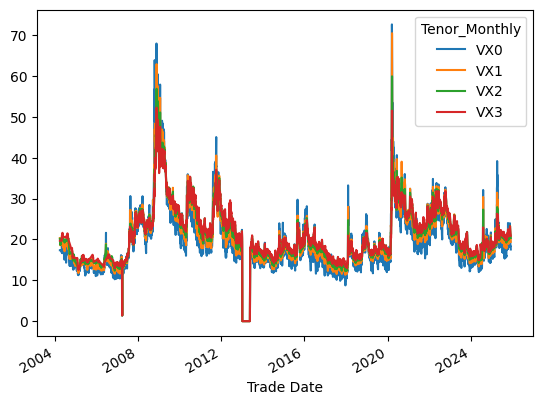

In [36]:
vix_futures_series_interpolated.plot()

In [41]:
import yfinance as yf
import pandas as pd

# 1. Download SPY adjusted close data
spy_data = yf.download('SPY', interval='1d')

# 2. Extract 'Close' column, which contains adjusted close prices when auto_adjust=True
spy_adj_close = spy_data['Close']
# Directly assign the name to the Series to avoid issues with .rename()
spy_adj_close.name = 'SPY_Adj_Close'

# 3. Merge with vix_futures_series_interpolated
# Use an outer join to keep all dates from both DataFrames, filling NaNs where data is missing in one.
merged_df = vix_futures_series_interpolated.merge(spy_adj_close,
                                                 left_index=True,
                                                 right_index=True,
                                                 how='outer')

print("Merged DataFrame Head:")
display(merged_df.head())

print("\nMerged DataFrame Tail:")
display(merged_df.tail())

/tmp/ipython-input-2737348711.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', interval='1d')
[*********************100%***********************]  1 of 1 completed

Merged DataFrame Head:


,VX0,VX1,VX2,VX3,SPY
2004-03-26,17.35,20.32,20.16,19.67,NaN
2004-03-29,17.35,19.80,19.77,19.67,NaN
2004-03-30,17.35,19.62,19.79,19.67,NaN
2004-03-31,17.35,19.75,19.85,19.67,NaN
2004-04-01,17.35,19.62,19.61,19.67,NaN



Merged DataFrame Tail:


,VX0,VX1,VX2,VX3,SPY
2025-12-01,18.3442,19.8539,20.7988,21.2461,680.270020
2025-12-02,17.9472,19.5901,20.5527,21.0750,681.530029
2025-12-03,17.7946,19.5796,20.5495,21.0050,683.890015
2025-12-04,17.5422,19.4156,20.3593,20.8879,684.390015
2025-12-05,NaN,NaN,NaN,NaN,685.690002


In [42]:
# Calculate the new difference series
merged_df['VX1-VX0'] = merged_df['VX1'] - merged_df['VX0']
merged_df['VX2-VX1'] = merged_df['VX2'] - merged_df['VX1']
merged_df['VX3-VX1'] = merged_df['VX3'] - merged_df['VX1']
merged_df['VX3-VX0'] = merged_df['VX3'] - merged_df['VX0']

print("Merged DataFrame with new difference series (Head):")
display(merged_df.head())

print("\nMerged DataFrame with new difference series (Tail):")
display(merged_df.tail())

Merged DataFrame with new difference series (Head):


,VX0,VX1,VX2,VX3,SPY,VX1-VX0,VX2-VX1,VX3-VX1,VX3-VX0
2004-03-26,17.35,20.32,20.16,19.67,NaN,2.97,-0.16,-0.65,2.32
2004-03-29,17.35,19.80,19.77,19.67,NaN,2.45,-0.03,-0.13,2.32
2004-03-30,17.35,19.62,19.79,19.67,NaN,2.27,0.17,0.05,2.32
2004-03-31,17.35,19.75,19.85,19.67,NaN,2.40,0.10,-0.08,2.32
2004-04-01,17.35,19.62,19.61,19.67,NaN,2.27,-0.01,0.05,2.32



Merged DataFrame with new difference series (Tail):


,VX0,VX1,VX2,VX3,SPY,VX1-VX0,VX2-VX1,VX3-VX1,VX3-VX0
2025-12-01,18.3442,19.8539,20.7988,21.2461,680.270020,1.5097,0.9449,1.3922,2.9019
2025-12-02,17.9472,19.5901,20.5527,21.0750,681.530029,1.6429,0.9626,1.4849,3.1278
2025-12-03,17.7946,19.5796,20.5495,21.0050,683.890015,1.7850,0.9699,1.4254,3.2104
2025-12-04,17.5422,19.4156,20.3593,20.8879,684.390015,1.8734,0.9437,1.4723,3.3457
2025-12-05,NaN,NaN,NaN,NaN,685.690002,NaN,NaN,NaN,NaN


This code calculates the specified differences between the 'VX' columns and adds them as new columns to the `merged_df`. The head and tail of the updated DataFrame are displayed to show the newly added series.

This code snippet first downloads the historical adjusted close prices for the SPY ETF using `yfinance`. It then extracts the 'Adj Close' column, renames it to 'SPY_Adj_Close' for better readability, and converts it to a DataFrame.

Finally, it performs an outer merge of the `vix_futures_series_interpolated` and the `spy_adj_close` DataFrames based on their common datetime indices. An outer merge ensures that all dates from both datasets are included in the new `merged_df`, filling in `NaN` where data from one source is missing on a particular date. The head and tail of the `merged_df` are displayed for verification.